# Q1 (CocaCola_Sales_Rawdata)

In [1]:
# importing libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.graphics.tsaplots as tsa_plots
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from statsmodels.tsa.holtwinters import Holt
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.formula.api as smf

In [2]:
csr=pd.read_excel('D:/ExcelR/Data Science Assignments/Assignments/Forecasting/CocaCola_Sales_Rawdata.xlsx')
csr

,Quarter,Sales
0,Q1_86,1734.827000
1,Q2_86,2244.960999
2,Q3_86,2533.804993
3,Q4_86,2154.962997
4,Q1_87,1547.818996
5,Q2_87,2104.411995
6,Q3_87,2014.362999
7,Q4_87,1991.746998
8,Q1_88,1869.049999
9,Q2_88,2313.631996


In [3]:
csr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Quarter  42 non-null     object 
 1   Sales    42 non-null     float64
dtypes: float64(1), object(1)
memory usage: 800.0+ bytes


In [4]:
csr.shape

(42, 2)

In [5]:
csr.describe()

,Sales
count,42.000000
mean,2994.353308
std,977.930896
min,1547.818996
25%,2159.714247
50%,2782.376999
75%,3609.250000
max,5253.000000


In [6]:
csr[csr.duplicated()]

,Quarter,Sales


In [7]:
# we will extract quarte values and year values separately from quarter column
csr['Quarters']=0
csr['Year']=0
for i in range(42):
    p=csr['Quarter'][i]
    csr['Quarters'][i]=p[0:2]
    csr['Year'][i]=p[3:5]

<ipython-input-7-f5e8bdb0caf6>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  csr['Quarters'][i]=p[0:2]
C:\Users\HP\anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
<ipython-input-7-f5e8bdb0caf6>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  csr['Year'][i]=p[3:5]


In [8]:
csr

,Quarter,Sales,Quarters,Year
0,Q1_86,1734.827000,Q1,86
1,Q2_86,2244.960999,Q2,86
2,Q3_86,2533.804993,Q3,86
3,Q4_86,2154.962997,Q4,86
4,Q1_87,1547.818996,Q1,87
5,Q2_87,2104.411995,Q2,87
6,Q3_87,2014.362999,Q3,87
7,Q4_87,1991.746998,Q4,87
8,Q1_88,1869.049999,Q1,88
9,Q2_88,2313.631996,Q2,88


In [9]:
csr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Quarter   42 non-null     object 
 1   Sales     42 non-null     float64
 2   Quarters  42 non-null     object 
 3   Year      42 non-null     int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 1.4+ KB


In [10]:
csr.shape

(42, 4)

In [11]:
csr.describe()

,Sales,Year
count,42.000000,42.000000
mean,2994.353308,90.761905
std,977.930896,3.074756
min,1547.818996,86.000000
25%,2159.714247,88.000000
50%,2782.376999,91.000000
75%,3609.250000,93.000000
max,5253.000000,96.000000


In [12]:
# getting dummy variables for quarters Q1, Q2, Q3, Q4
Quarters_Dummies=pd.DataFrame(pd.get_dummies(csr['Quarters']))
csr=pd.concat([csr,Quarters_Dummies],axis=1)
csr

,Quarter,Sales,Quarters,Year,Q1,Q2,Q3,Q4
0,Q1_86,1734.827000,Q1,86,1,0,0,0
1,Q2_86,2244.960999,Q2,86,0,1,0,0
2,Q3_86,2533.804993,Q3,86,0,0,1,0
3,Q4_86,2154.962997,Q4,86,0,0,0,1
4,Q1_87,1547.818996,Q1,87,1,0,0,0
5,Q2_87,2104.411995,Q2,87,0,1,0,0
6,Q3_87,2014.362999,Q3,87,0,0,1,0
7,Q4_87,1991.746998,Q4,87,0,0,0,1
8,Q1_88,1869.049999,Q1,88,1,0,0,0
9,Q2_88,2313.631996,Q2,88,0,1,0,0


<AxesSubplot:ylabel='Density'>

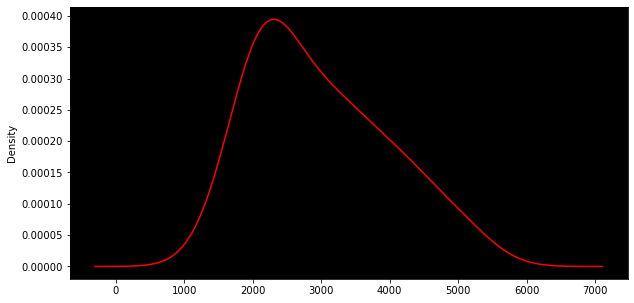

In [13]:
# density plot
ax = plt.axes()
ax.set_facecolor("black")
csr['Sales'].plot(kind='kde',figsize=(10,5),color='red')

<AxesSubplot:xlabel='Quarters', ylabel='Sales'>

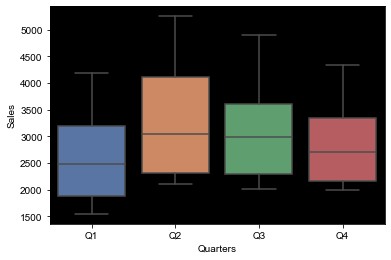

In [14]:
# boxplot of Quarters Vs. Sales
ax = plt.axes()
ax.set_facecolor("black")
sns.set(rc={'figure.figsize':(8,5)})
sns.boxplot(x="Quarters",y="Sales",data=csr)

<AxesSubplot:xlabel='Year', ylabel='Sales'>

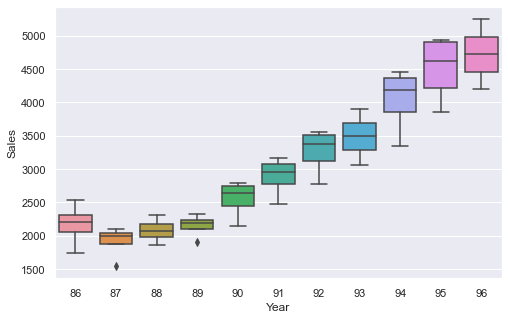

In [15]:
# boxplot of years vs sales
sns.boxplot(x="Year",y="Sales",data=csr)

<AxesSubplot:xlabel='Year', ylabel='Sales'>

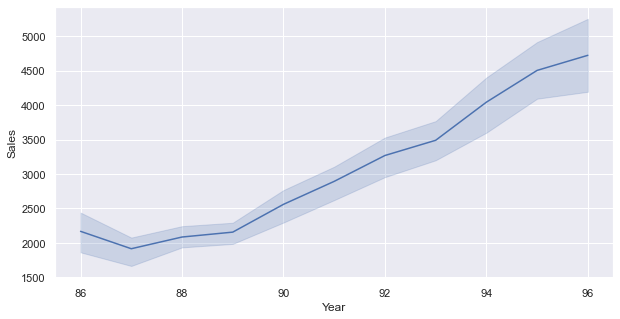

In [16]:
# lineplot of years vs sales
plt.figure(figsize=(10,5))
sns.lineplot(x="Year",y="Sales",data=csr)

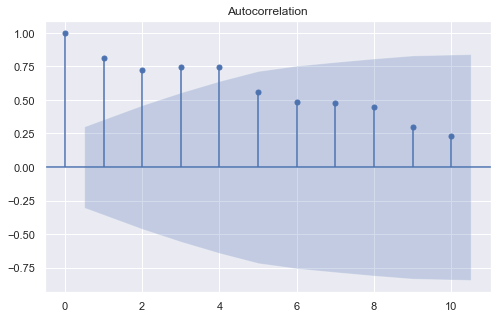

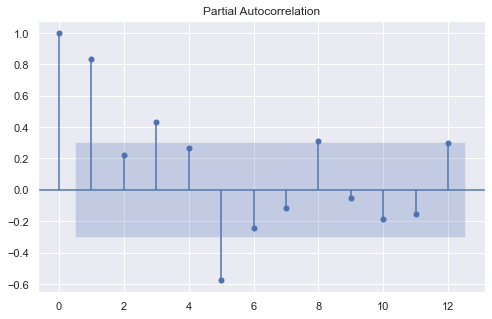

In [17]:
tsa_plots.plot_acf(csr.Sales,lags=10)
tsa_plots.plot_pacf(csr.Sales,lags=12)
plt.show()

<AxesSubplot:xlabel='Quarters', ylabel='Year'>

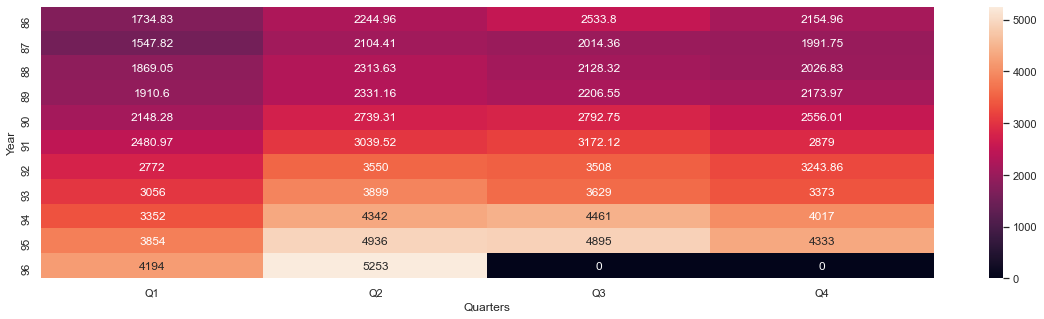

In [18]:
plt.figure(figsize=(20,5))
heatmap_y_month=pd.pivot_table(data=csr,values="Sales",index="Year",columns="Quarters",aggfunc="mean",fill_value=0)
sns.heatmap(heatmap_y_month,annot=True,fmt="g")

**data driven forcating method**

In [19]:
# splitting data into Train and Test
Train=csr.head(32)
Train

,Quarter,Sales,Quarters,Year,Q1,Q2,Q3,Q4
0,Q1_86,1734.827000,Q1,86,1,0,0,0
1,Q2_86,2244.960999,Q2,86,0,1,0,0
2,Q3_86,2533.804993,Q3,86,0,0,1,0
3,Q4_86,2154.962997,Q4,86,0,0,0,1
4,Q1_87,1547.818996,Q1,87,1,0,0,0
5,Q2_87,2104.411995,Q2,87,0,1,0,0
6,Q3_87,2014.362999,Q3,87,0,0,1,0
7,Q4_87,1991.746998,Q4,87,0,0,0,1
8,Q1_88,1869.049999,Q1,88,1,0,0,0
9,Q2_88,2313.631996,Q2,88,0,1,0,0


In [20]:
Test=csr.tail(10)
Test

,Quarter,Sales,Quarters,Year,Q1,Q2,Q3,Q4
32,Q1_94,3352.0,Q1,94,1,0,0,0
33,Q2_94,4342.0,Q2,94,0,1,0,0
34,Q3_94,4461.0,Q3,94,0,0,1,0
35,Q4_94,4017.0,Q4,94,0,0,0,1
36,Q1_95,3854.0,Q1,95,1,0,0,0
37,Q2_95,4936.0,Q2,95,0,1,0,0
38,Q3_95,4895.0,Q3,95,0,0,1,0
39,Q4_95,4333.0,Q4,95,0,0,0,1
40,Q1_96,4194.0,Q1,96,1,0,0,0
41,Q2_96,5253.0,Q2,96,0,1,0,0


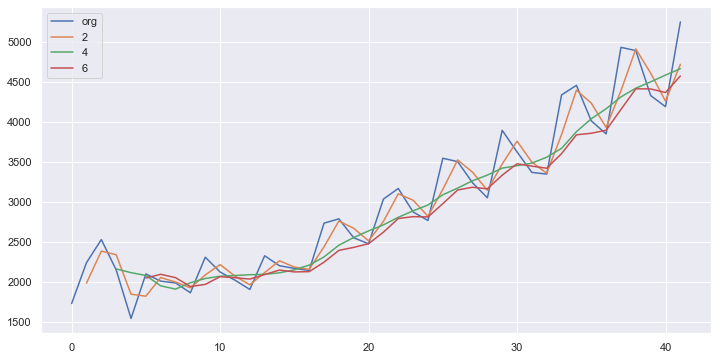

In [21]:
# moving average method
plt.figure(figsize=(12,6))
csr.Sales.plot(label="org")
for i in range(2,8,2):
    csr["Sales"].rolling (i).mean().plot(label=str(i))
    plt.legend(loc='best')

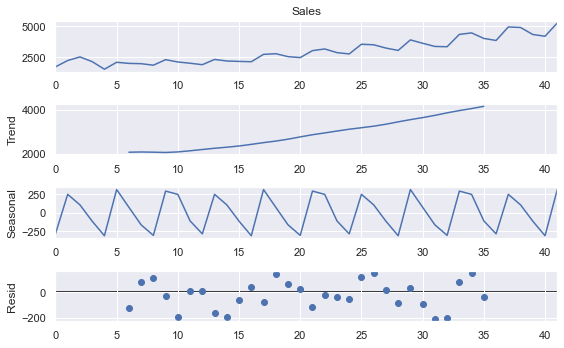

In [22]:
# tiem series decomposition plot
decompose_ts_add=seasonal_decompose(csr.Sales,period=12)
decompose_ts_add.plot()
plt.show()

**evaluatio metrice RMSE**

In [23]:
def RMSE(org,pred):
    rmse=np.sqrt(np.mean((np.array(org)-np.array(pred))**2))
    return rmse

In [24]:
import warnings
warnings.filterwarnings("ignore")

In [25]:
#simple exponential method
ses_model=SimpleExpSmoothing(Train["Sales"]).fit()
pred_ses=ses_model.predict(start=Test.index[0],end=Test.index[-1])
rmse_ses_model=RMSE(Test.Sales,pred_ses)
rmse_ses_model

1035.1983219196004

In [26]:
# holt method
hw_model=Holt(Train["Sales"]).fit()
pre_hw=hw_model.predict(start=Test.index[0],end=Test.index[-1])
rmse_hw_model=RMSE(Test.Sales,pre_hw)
rmse_hw_model

708.8812989535168

In [27]:
# holts winter exponential smoothing with additive seasonality and additive trend
hwe_model_add_add=ExponentialSmoothing(Train["Sales"],seasonal="add",trend="add",seasonal_periods=4).fit()
pred_hwe_add_add=hwe_model_add_add.predict(start=Test.index[0],end=Test.index[-1])
rmse_hwe_add_add_model=RMSE(Test.Sales,pred_hwe_add_add)
rmse_hwe_add_add_model

480.5493437573354

In [28]:
hwe_model_mul_add=ExponentialSmoothing(Train["Sales"],seasonal="mul",trend="add",seasonal_periods=4).fit() 
pred_hwe_mul_add=hwe_model_mul_add.predict(start=Test.index[0],end=Test.index[-1])
rmse_hwe_model_mul_add_model=RMSE(Test.Sales,pred_hwe_mul_add)
rmse_hwe_model_mul_add_model

547.9743419527241

In [29]:
# model based forcasting method & data preprocessing for models
csr["t"]=np.arange(1,43)
csr["t_squared"]=csr["t"]*csr["t"]
csr["log_sales"]=np.log(csr["Sales"])
csr

,Quarter,Sales,Quarters,Year,Q1,Q2,Q3,Q4,t,t_squared,log_sales
0,Q1_86,1734.827000,Q1,86,1,0,0,0,1,1,7.458663
1,Q2_86,2244.960999,Q2,86,0,1,0,0,2,4,7.716443
2,Q3_86,2533.804993,Q3,86,0,0,1,0,3,9,7.837477
3,Q4_86,2154.962997,Q4,86,0,0,0,1,4,16,7.675529
4,Q1_87,1547.818996,Q1,87,1,0,0,0,5,25,7.344602
5,Q2_87,2104.411995,Q2,87,0,1,0,0,6,36,7.651791
6,Q3_87,2014.362999,Q3,87,0,0,1,0,7,49,7.608058
7,Q4_87,1991.746998,Q4,87,0,0,0,1,8,64,7.596767
8,Q1_88,1869.049999,Q1,88,1,0,0,0,9,81,7.533186
9,Q2_88,2313.631996,Q2,88,0,1,0,0,10,100,7.746574


In [30]:
# splitting data into Train and Test
Train=csr.head(32)
Test=csr.tail(10)

In [31]:
# linear model
linear_model=smf.ols('Sales~t',data=Train).fit()
pred_linear=pd.Series(linear_model.predict(pd.DataFrame(Test['t'])))
rmse_linear_model=RMSE(Test['Sales'],pred_linear)
rmse_linear_model

752.9233932767121

In [32]:
# exponential model
Exp=smf.ols('log_sales~t',data=Train).fit()
pred_Exp=pd.Series(Exp.predict(pd.DataFrame(Test['t'])))
rmse_Exp_model=RMSE(Test['Sales'],np.exp(pred_Exp))
rmse_Exp_model

590.3316432076657

In [33]:
# quadratic model
Quad=smf.ols('Sales~t+t_squared',data=Train).fit()
pred_Quad=pd.Series(Quad.predict(Test[["t","t_squared"]]))
rmse_Quad_model=RMSE(Test['Sales'],pred_Quad)
rmse_Quad_model

457.7357355407437

In [34]:
# additive seasonality model
add_sea=smf.ols('Sales~Q1+Q2+Q3',data=Train).fit()
pred_add_sea=pd.Series(add_sea.predict(Test[['Q1','Q2','Q3']]))
rmse_add_sea=RMSE(Test['Sales'],pred_add_sea)
rmse_add_sea

1850.4665461858358

In [35]:
# additive seasonality quadratic model
add_sea_Quad=smf.ols('Sales~t+t_squared+Q1+Q2+Q3',data=Train).fit()
pred_add_sea_quad=pd.Series(add_sea_Quad.predict(Test[['Q1','Q2','Q3','t','t_squared']]))
rmse_add_sea_Quad_model=RMSE(Test['Sales'], pred_add_sea_quad)
rmse_add_sea_Quad_model  

277.351077112877

In [36]:
# multiplicative seasonality mode
Mul_sea=smf.ols('log_sales~Q1+Q2+Q3',data=Train).fit()
pred_Mult_sea=pd.Series(Mul_sea.predict(Test))
rmse_Mul_sea=RMSE(Test['Sales'],np.exp(pred_Mult_sea))
rmse_Mul_sea

1908.2503948361139

In [37]:
# multiplicative additive seasonality mode
Mul_Add_sea=smf.ols('log_sales~t+Q1+Q2+Q3',data=Train).fit()
pred_Mult_add_sea=pd.Series(Mul_Add_sea.predict(Test))
rmse_Mul_Add_sea=RMSE(Test['Sales'],np.exp(pred_Mult_add_sea))
rmse_Mul_Add_sea

448.8678182691915

In [38]:
list=[['Simple Exponential Method',rmse_ses_model],['Holt method',rmse_hw_model],
          ['HW exp smoothing add',rmse_hwe_add_add_model],['HW exp smoothing mult',rmse_hwe_model_mul_add_model],
          ['Linear Mode',rmse_linear_model],['Exp model',rmse_Exp_model],['Quad model',rmse_Quad_model],
          ['add seasonality',rmse_add_sea],['Quad add seasonality',rmse_add_sea_Quad_model],
          ['Mult Seasonality',rmse_Mul_sea],['Mult add seasonality',rmse_Mul_Add_sea]]
list

[['Simple Exponential Method', 1035.1983219196004],
 ['Holt method', 708.8812989535168],
 ['HW exp smoothing add', 480.5493437573354],
 ['HW exp smoothing mult', 547.9743419527241],
 ['Linear Mode', 752.9233932767121],
 ['Exp model', 590.3316432076657],
 ['Quad model', 457.7357355407437],
 ['add seasonality', 1850.4665461858358],
 ['Quad add seasonality', 277.351077112877],
 ['Mult Seasonality', 1908.2503948361139],
 ['Mult add seasonality', 448.8678182691915]]

In [39]:
df=pd.DataFrame(list,columns=['Model','RMSE_Value']) 
df

,Model,RMSE_Value
0,Simple Exponential Method,1035.198322
1,Holt method,708.881299
2,HW exp smoothing add,480.549344
3,HW exp smoothing mult,547.974342
4,Linear Mode,752.923393
5,Exp model,590.331643
6,Quad model,457.735736
7,add seasonality,1850.466546
8,Quad add seasonality,277.351077
9,Mult Seasonality,1908.250395


**building final model with least RMSE**

In [40]:
final_model=smf.ols('Sales~t+t_squared+Q1+Q2+Q3',data=csr).fit()
pred_final=pd.Series(final_model.predict(csr[['Q1','Q2','Q3','t','t_squared']]))
rmse_final_model=RMSE(csr['Sales'],pred_final)
rmse_final_model

159.05522576522472

In [41]:
pred_df=pd.DataFrame({'Actual':csr.Sales,'Predicted':pred_final})
pred_df

,Actual,Predicted
0,1734.827000,1626.592727
1,2244.960999,2268.402339
2,2533.804993,2189.685821
3,2154.962997,1867.242917
4,1547.818996,1658.311143
5,2104.411995,2314.185178
6,2014.362999,2249.533083
7,1991.746998,1941.154603
8,1869.049999,1746.287252
9,2313.631996,2416.225709


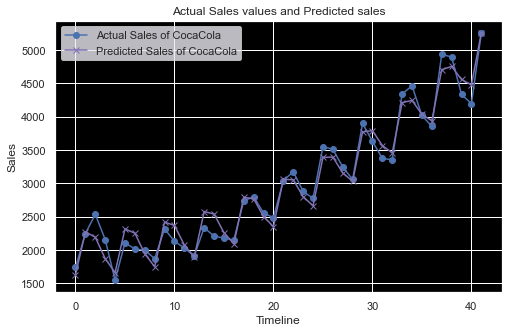

In [42]:
# plot of actual sales values and predicted sales values
plt.plot(csr.Sales,color='b',marker='o',label='Actual Sales of CocaCola')
plt.plot(pred_final,color='m',marker='x',label='Predicted Sales of CocaCola')
ax=plt.axes()
ax.set_facecolor("black")
plt.title('Actual Sales values and Predicted sales')
plt.xlabel("Timeline")
plt.ylabel("Sales")
plt.legend()
plt.rcParams['figure.figsize']=(15,10)
plt.show()